In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
import spacy 
from tqdm import tqdm
import numpy as np
import re

from sklearn.linear_model import SGDClassifier

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("train.csv")
df.head()



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [54]:
del df['id']

In [ ]:
def toxcity(df):
    df['is_toxic'] = -1
    for i in range(len(df)):
        df['is_toxic'][i] = (1 if (df.toxic[i] or df.obscene[i] or df.severe_toxic[i] or df.threat[i] or df.insult[i] or df.identity_hate[i]) else 0)
    df.drop(df.iloc[:, 1:7], inplace=True, axis=1)
    return(df)


In [57]:
print(df.obscene[2])

0


In [58]:
df['is_toxic'] = -1

In [ ]:
for i in range(len(df)):
    if df.toxic[i] == 1 or df.obscene[i] == 1 or df.severe_toxic[i] == 1 or df.threat[i] == 1 or df.insult[i] == 1 or df.identity_hate[i] == 1:
        df['is_toxic'][i] = 1
    else:
        df['is_toxic'][i] = 0
        
        

In [4]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# ref: https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe

def cleaning(df):
    df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) # remove emojies https://stackoverflow.com/questions/57514169/how-can-i-remove-emojis-from-a-dataframe
    df['comment_text'] = df['comment_text'].apply(lambda x: re.split('http(s)?:\/\/.*', str(x))[0])  # removing urls from text
    df['comment_text'] = df['comment_text'].str.replace(r'[\t\n]', ' ')
    df['comment_text'] = df['comment_text'].str.replace(r'[^a-zA-Z0-9 \']', '') # removed all characters except alphanumeric data and whitespace
    df['comment_text'] = df['comment_text'].str.strip()
    return(df)


In [6]:
train = cleaning(df)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,D'aww He matches this background colour I'm se...,0,0,0,0,0,0
2,Hey man I'm really not trying to edit war It's...,0,0,0,0,0,0
3,More I can't make any real suggestions on impr...,0,0,0,0,0,0
4,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [7]:
print('Checking Null')
print(df.isnull().any())

Checking Null
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool


In [103]:
def toxcity(df):
    df['is_toxic'] = -1
    for i in range(len(df)):
        df['is_toxic'][i] = (1 if (df.toxic[i] or df.obscene[i] or df.severe_toxic[i] or df.threat[i] or df.insult[i] or df.identity_hate[i]) else 0)
    df.drop(df.iloc[:, 1:7], inplace=True, axis=1)
    return(df)

    

In [ ]:
train1 = toxcity(train)
train1.head()

In [3]:
train = pd.read_csv("new_train_data.csv")

In [4]:
train.head()

,comment_text,is_toxic
0,Explanation Why the edits made under my userna...,0
1,Daww He matches this background colour Im seem...,0
2,Hey man Im really not trying to edit war Its j...,0
3,More I cant make any real suggestions on impro...,0
4,You sir are my hero Any chance you remember wh...,0


In [5]:
def contractions(df):

    df['comment_text'] = df['comment_text'].str.lower()

    df['comment_text'] = df['comment_text'].replace( { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he has",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has",
    "i'd": "I had",
    "i'd've": "I would have",
    "i'll": "I shall",
    "i'll've": "I shall have",
    "i'm": "I am",
    "im" : "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it shall",
    "it'll've": "it shall have",
    "it's": "it has",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she shall",
    "she'll've": "she shall have",
    "she's": "she has",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that has",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there has",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they shall",
    "they'll've": "they shall have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall",
    "what'll've": "what shall have",
    "what're": "what are",
    "what's": "what has",
    "what've": "what have",
    "when's": "when has",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has",
    "where've": "where have",
    "who'll": "who shall",
    "who'll've": "who shall have",
    "who's": "who has",
    "who've": "who have",
    "why's": "why has",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you shall",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have"
    })
    return(df)



In [6]:
train1 = contractions(train)
train1.to_csv('new_train_data2.csv',index=False)
train1.head()

,comment_text,is_toxic
0,explanation why the edits made under my userna...,0
1,daww he matches this background colour im seem...,0
2,hey man im really not trying to edit war its j...,0
3,more i cant make any real suggestions on impro...,0
4,you sir are my hero any chance you remember wh...,0


In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [165]:
word_Lemmatized = WordNetLemmatizer()
for index, comment in enumerate(train1['comment_text']):

    temp_data = []
    for word in str(comment).split():
        if word not in stopwords and word.isalpha():
            temp_word = word_Lemmatized.lemmatize(word)
            temp_data.append(temp_word)
    train1.loc[index,'comment_text'] = str(" ".join(temp_data))

## Start..

In [3]:
train = pd.read_csv("new_train_data3.csv")
train = train[train['comment_text'].notna()]
train.isnull().values.any()

False

In [4]:
y_train2 = pd.DataFrame()

In [5]:
train2 = pd.DataFrame(train['comment_text'], columns = ['comment_text']) 
y_train1 = train['is_toxic'] 

## Splitting of Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train2,y_train1, test_size=0.20, stratify = y_train1)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [7]:
print(X_train[:10])

                                             comment_text
10349          clear evidence abuse someone administrator
66617   greek art created greek art page much adam car...
93265   unless objection preplace controversy section ...
17338   holocaust dont know detailed comparison americ...
62518   tifjo made statement ani dont know mean suppos...
61704   blow right freedom speech edit wikipedia fuck ...
133118  information take gander wpsignature forgery dl...
89000                               sorry cannot homework
11557   page fails explain creation gederal reserve sy...
142716  chris rogers actor deletion hello aitias infor...


## BAG OF WORDS


In [14]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).

from sklearn.feature_extraction.text import CountVectorizer
bow_vec_ct = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
bow_vec_ct.fit(X_train['comment_text'].values.astype('U')) 


# we use the fitted CountVectorizer to convert the text to vector
def bow(a,b,c):
    X_train_ct_bow = bow_vec_ct.transform(a['comment_text'].values)
    X_cv_ct_bow = bow_vec_ct.transform(b['comment_text'].values)
    X_test_ct_bow = bow_vec_ct.transform(c['comment_text'].values)
    return   X_train_ct_bow,  X_cv_ct_bow, X_test_ct_bow


X_train_ct_bow,X_cv_ct_bow,X_test_ct_bow = bow(X_train,X_cv,X_test)
print("After vectorizations")
print(X_train_ct_bow.shape, y_train.shape)
print(X_cv_ct_bow.shape, y_cv.shape)
print(X_test_ct_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(101948, 5000) (101948,)
(25487, 5000) (25487,)
(31859, 5000) (31859,)


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train2,y_train2 = sm.fit_sample(X_train_ct_bow, y_train)

In [15]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    matrix = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    # matrix = 2,2 matrix, each cell in (i,j) shows number of points 
    
    pr =(((matrix.T)/(matrix.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    re =(matrix/matrix.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(re, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(pr, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# BOW with Support Vector Machine

For values of alpha =  1e-05 The log loss is: 0.6739778599065698
For values of alpha =  0.0001 The log loss is: 0.6724965447044442
For values of alpha =  0.001 The log loss is: 0.661239597663223
For values of alpha =  0.01 The log loss is: 0.6537829058219158
For values of alpha =  0.1 The log loss is: 0.6951877474867983
For values of alpha =  1 The log loss is: 0.7310663200879058
For values of alpha =  10 The log loss is: 0.6556396920471768
For values of best alpha =  1e-05 The test log loss is: 0.6742180689801252
Total number of data points : 31859


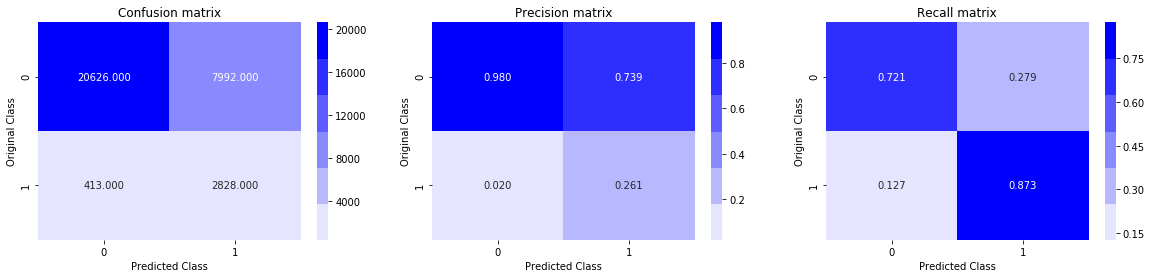

In [17]:
# hyperparam for SGD classifier.

#  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

def svm(a,b,c,d) :
    alpha = [10 ** x for x in range(-5, 2)] 
    error_list=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
        clf.fit(a,b)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(a,b)
        predict_y = sig_clf.predict_proba(c)
        error_list.append(log_loss(d, predict_y, labels=clf.classes_, eps=1e-15))
        print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


error_list1 = svm(x_train2, y_train2, X_cv_ct_bow, y_cv)

best_alpha = np.argmin(error_list1)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train2, y_train2)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train2, y_train2)



predict_y = sig_clf.predict_proba(X_test_ct_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# BOW with Random Forest

In [18]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

parameter = {"n_estimators":sp_randint(102,127),
              "max_depth": sp_randint(8,18),
              "min_samples_split": sp_randint(108,192),
              "min_samples_leaf": sp_randint(23,67)}

clf = RandomForestClassifier(random_state=26,n_jobs=-1)

random_s = RandomizedSearchCV(clf, param_distributions=parameter,
                                   n_iter=5,cv= 3,scoring='f1',random_state=26,return_train_score=True)
a = random_s.fit(x_train2, y_train2)
print(random_s.best_estimator_)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=44, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)


In [19]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=44, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

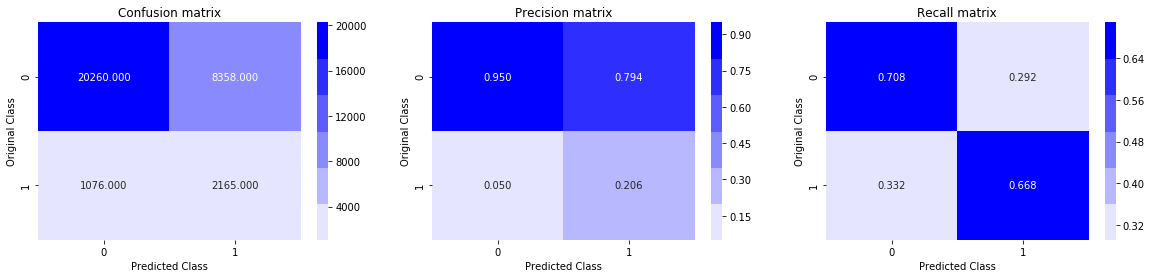

In [20]:
clf.fit(x_train2,y_train2)
y_train_pred = clf.predict(x_train2)
y_test_pred = clf.predict(X_test_ct_bow)

plot_confusion_matrix(y_test,y_test_pred )

# Bow with Adaboost

In [21]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param = {
 'n_estimators': [50, 60, 80, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pram_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

a = pram_clf.fit(x_train2,y_train2)
print(pram_clf.best_estimator_)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=80, random_state=None)


In [22]:
clf = AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=80, random_state=None)

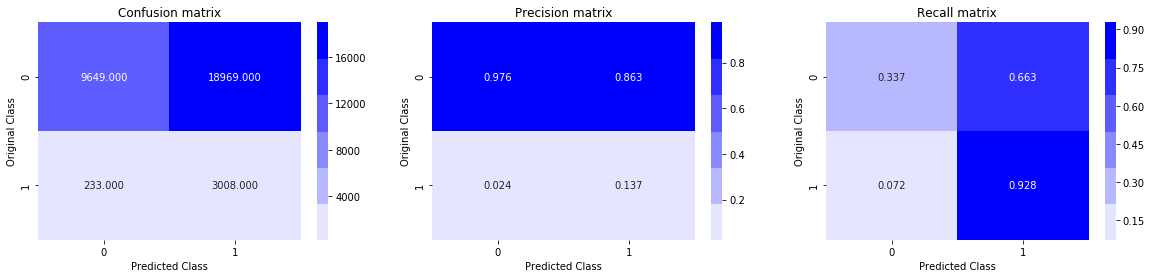

In [23]:
clf.fit(x_train2,y_train2)
y_test_pred = clf.predict(X_test_ct_bow)
predicted_y =np.array(y_test_pred>0.5,dtype=int)
plot_confusion_matrix(y_test,predicted_y)


## TFIDF vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
tfidf_vec.fit(X_train['comment_text'].values.astype('U')) 

# we use the fitted CountVectorizer to convert the text to vector
def tfidf(a,b,c):
    d = tfidf_vec.transform(X_train['comment_text'].values.astype('U'))
    e = tfidf_vec.transform(X_cv['comment_text'].values.astype('U'))
    f = tfidf_vec.transform(X_test['comment_text'].values.astype('U'))
    return d,e,f

X_train_ct_tfidf, X_cv_ct_tfidf, X_test_ct_tfidf = tfidf(X_train, X_cv, X_test)
print("After vectorizations")
print(X_train_ct_tfidf.shape, y_train.shape)
print(X_cv_ct_tfidf.shape, y_cv.shape)
print(X_test_ct_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(101948, 5000) (101948,)
(25487, 5000) (25487,)
(31859, 5000) (31859,)


## new_tfidf

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
tfidf_vec.fit(X_train['comment_text'].values.astype('U')) 

# we use the fitted CountVectorizer to convert the text to vector
def tfidf(a,b,c):
    d = tfidf_vec.transform(X_train['comment_text'].values.astype('U'))
    e = tfidf_vec.transform(X_cv['comment_text'].values.astype('U'))
  
    f = tfidf_vec.transform(['cannibalistic'])
    return d,e,f

X_train_ct_tfidf,X_cv_ct_tfidf,X_test_ct_tfidf = tfidf(X_train, X_cv,['cannibalistic'])
print("After vectorizations")
print(X_train_ct_tfidf.shape, y_train1.shape)

print(X_test_ct_tfidf.shape)
print("="*100)

After vectorizations
(101948, 5000) (101948,)
(25487, 5000) (25487,)
(1, 5000) (31859,)


## balancing the data

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train2,y_train2 = sm.fit_sample(X_train_ct_tfidf, y_train)

# Tfidf with Support Vector Machine

For values of alpha =  1e-05 The log loss is: 0.2417211375711291
[0.2417211375711291]
0
alpha 1e-05
For values of best alpha =  1e-05 The test log loss is: 0.24148859663144231
Total number of data points : 31859


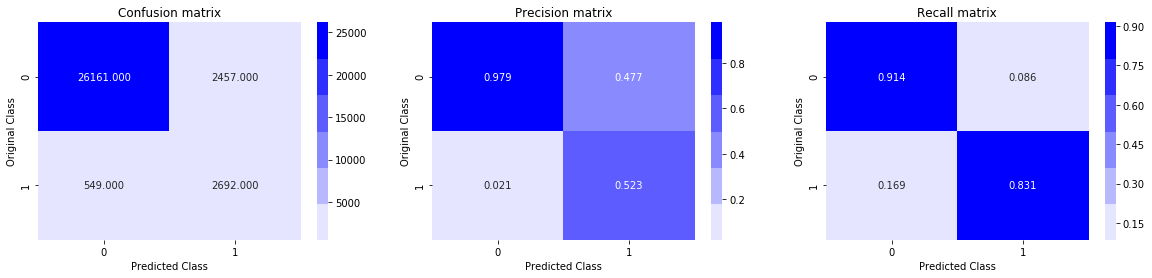

In [17]:
# hyperparam for SGD classifier.

#  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = [10 ** x for x in range(-5, 2)] 
def svm(a,b,c,d) :
    alpha = [10 ** x for x in range(-5, 2)] 
    error_list=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
        clf.fit(a,b)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(a,b)
        predict_y = sig_clf.predict_proba(c)
        error_list.append(log_loss(d, predict_y, labels=clf.classes_, eps=1e-15))
        print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
        return  error_list


error_list1 = svm(x_train2, y_train2,X_cv_ct_tfidf,y_cv)


best_alpha = np.argmin(error_list1)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train2, y_train2)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train2, y_train2)



predict_y = sig_clf.predict_proba(X_test_ct_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## new_svm with user tfidf

In [ ]:
#------------------------------
alpha = [10 ** x for x in range(-5, 2)] 
def svm(a,b,c,d) :
    alpha = [10 ** x for x in range(-5, 2)] 
    error_list=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
        clf.fit(a,b)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(a,b)
        predict_y = sig_clf.predict_proba(c)
        error_list.append(log_loss(d, predict_y, labels=clf.classes_, eps=1e-15))
        print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
        return  error_list


error_list1 = svm(x_train2, y_train2,X_cv_ct_tfidf,y_cv)





best_alpha = np.argmin(error_list1)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train2, y_train2)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train2, y_train2)

In [41]:



predict_y = sig_clf.predict_proba(X_test_ct_tfidf)

predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
print(predicted_y)

Total number of data points : 1
[1]


# TFIDF with Random Forest

In [31]:
parameter = {"n_estimators":sp_randint(102,127),
              "max_depth": sp_randint(8,18),
              "min_samples_split": sp_randint(108,192),
              "min_samples_leaf": sp_randint(23,67)}

clf = RandomForestClassifier(random_state=26,n_jobs=-1)

random_s = RandomizedSearchCV(clf, param_distributions=parameter,
                                   n_iter=5,cv= 3,scoring='f1',random_state=26,return_train_score=True)
a = random_s.fit(x_train2,y_train2)
print(random_s.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=44, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)


In [32]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=44, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

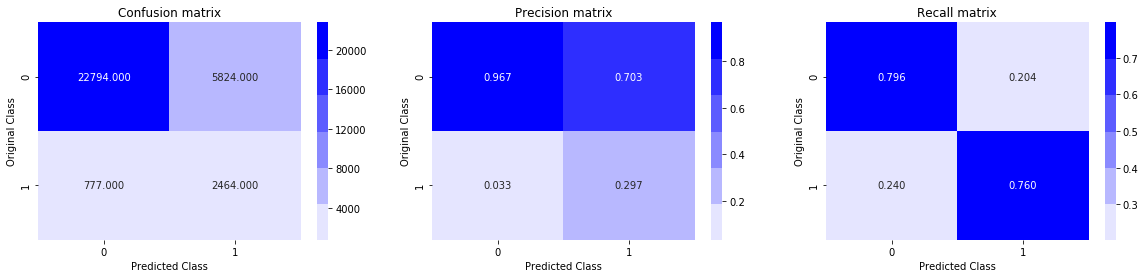

In [33]:
clf.fit(x_train2,y_train2)
y_train_pred = clf.predict(x_train2)
y_test_pred = clf.predict(X_test_ct_tfidf)

plot_confusion_matrix( y_test,y_test_pred )

# TFIDF with AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param = {
 'n_estimators': [50, 60, 80, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pram_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

a = pram_clf.fit(x_train2,y_train2)
print(pram_clf.best_estimator_)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=60, random_state=None)


In [35]:
clf = AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=60, random_state=None)

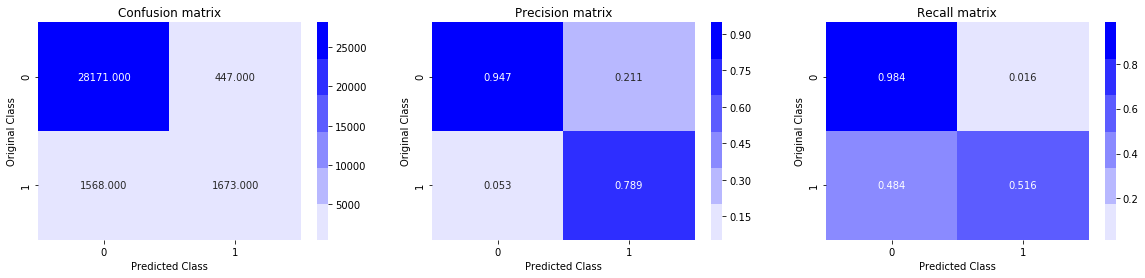

In [36]:
clf.fit(x_train2,y_train2)
y_test_pred = clf.predict(X_test_ct_tfidf)
predicted_y =np.array(y_test_pred>0.5,dtype=int)
plot_confusion_matrix(y_test,predicted_y)


# Spacy

In [37]:
tfidf_s = dict(zip(tfidf_vec.get_feature_names(), tfidf_vec.idf_))

In [38]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

comment_text = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['comment_text'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = tfidf_s[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    comment_text.append(mean_vec1)
print(len(comment_text))
print(len(comment_text[0]))
X_train['comment_text1'] = list(comment_text )

100%|█████████████████████████████████████████████████████████████████████████| 101948/101948 [15:39<00:00, 108.53it/s]


101948
96


In [39]:
XY = pd.DataFrame(columns = ['comment_text'])
XY['comment_text'] = list(comment_text)
df_new = pd.DataFrame(XY.comment_text.values.tolist(), index= XY.index)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train2,y_train2 = sm.fit_sample(df_new , y_train)

In [42]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

comment_text = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_cv['comment_text'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = tfidf_s[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    comment_text.append(mean_vec1)
print(len(comment_text))
print(len(comment_text[0]))
X_cv['comment_text1'] = list(comment_text )

100%|███████████████████████████████████████████████████████████████████████████| 25487/25487 [04:05<00:00, 103.64it/s]


25487
96


In [43]:
XY1 = pd.DataFrame(columns = ['comment_text'])
XY1['comment_text'] = list(comment_text)
df_cv_new = pd.DataFrame(XY1.comment_text.values.tolist(), index= XY1.index)

In [44]:
df_cv_new.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-15.880058,-28.875363,-28.539435,-18.997203,-50.295868,30.314914,108.037868,9.411263,-38.629977,-33.107485,...,70.137579,-35.841293,53.856959,29.464661,31.210159,-29.391865,-6.367275,-16.126103,-53.142411,-15.193226
1,20.987837,-48.815492,-68.484496,-55.829596,-34.271734,15.821836,130.257971,-32.870680,22.385478,14.181403,...,44.734846,-12.417790,-18.430351,19.815446,5.507643,-46.593823,-28.828283,6.795004,-11.149944,-4.289075
2,-10.919195,-21.998960,-31.622413,-7.127448,-41.432863,41.768023,93.645132,2.948188,-10.649609,-7.569720,...,55.099672,7.210356,38.367812,-14.601727,-0.469636,-14.330968,-45.238995,-4.061300,-37.509213,-7.654617
3,46.186430,12.104392,-10.230745,-103.434955,-91.259350,28.002595,36.742390,28.352174,-55.230114,40.472649,...,72.435084,-46.473660,63.358983,60.119143,34.172865,29.769372,36.453627,-22.008026,-54.862925,84.500657
4,234.886171,-263.884090,-242.220473,-386.443973,-392.012327,64.881019,355.943549,16.826198,-42.664855,198.665311,...,110.673636,-233.763551,343.418528,57.288389,-79.305383,31.654795,-90.308409,-75.674219,-299.151292,173.059553


In [46]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

comment_text = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['comment_text'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = tfidf_s[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    comment_text.append(mean_vec1)
print(len(comment_text))
print(len(comment_text[0]))
X_test['comment_text1'] = list(comment_text )

100%|███████████████████████████████████████████████████████████████████████████| 31859/31859 [05:11<00:00, 102.33it/s]


31859
96


In [47]:
XY2 = pd.DataFrame(columns = ['comment_text'])
XY2['comment_text'] = list(comment_text)
df_test_new = pd.DataFrame(XY2.comment_text.values.tolist(), index= XY2.index)
df_test_new.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,336.196593,-247.058614,-205.415365,-428.874841,-108.165971,338.023076,812.469389,69.059050,-100.816280,188.709439,...,264.991146,-132.223005,568.902921,-195.593384,-149.354198,-53.136377,-176.626199,-252.299998,-331.444394,208.074842
1,11.854789,-6.399877,-50.214412,-62.003194,-49.833511,40.150415,60.333623,-5.859304,-21.188183,30.814601,...,34.119025,-31.757971,56.002636,42.178877,2.369319,-3.983353,-11.022219,-16.504632,-7.638861,-45.516783
2,68.996689,-246.114313,-129.354172,-192.767919,-264.727661,96.159021,515.212160,-119.080135,-73.254229,92.406453,...,244.428128,-127.391637,184.594063,3.717136,23.064505,-54.904811,-137.544082,-82.309295,-205.536162,92.080614
3,120.580571,-118.850427,-37.867939,-254.817891,-311.186484,141.158035,229.901842,11.686581,11.727975,121.075016,...,161.738921,-99.892461,278.912667,86.688286,70.500061,-107.594312,-58.492397,-77.820313,-125.703847,113.565953
4,379.626118,-366.722827,-308.679065,-375.708530,-266.510203,112.445150,1025.612919,-91.870975,-180.096706,120.921388,...,297.363468,-89.278449,618.436780,-29.311899,-128.531336,25.505840,-268.467547,-128.389699,-468.408734,211.374082


# Spacy with Support Vector Machine

For values of alpha =  1e-05 The log loss is: 0.6931471805599452
For values of alpha =  0.0001 The log loss is: 0.6931471805599452
For values of alpha =  0.001 The log loss is: 0.6931471805599452
For values of alpha =  0.01 The log loss is: 0.6926792686132575
For values of alpha =  0.1 The log loss is: 0.676210265969315
For values of alpha =  1 The log loss is: 0.6768166349536067
For values of alpha =  10 The log loss is: 0.6658229591036571
For values of best alpha =  1e-05 The test log loss is: 0.6931471805599452
Total number of data points : 31859


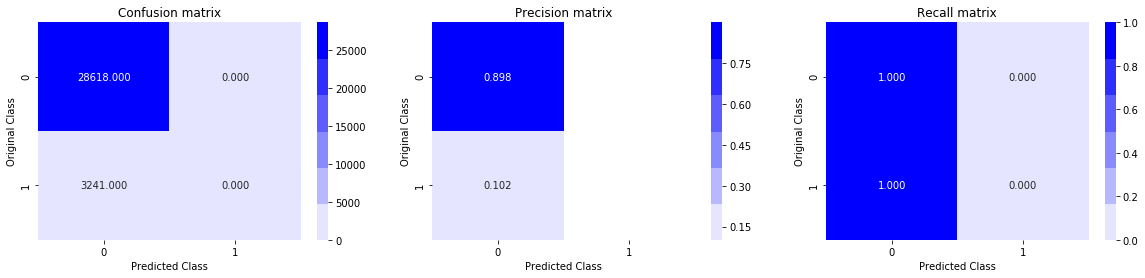

In [50]:
# hyperparam for SGD classifier.

#  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

def svm(a,b,c,d) :
    alpha = [10 ** x for x in range(-5, 2)] 
    error_list=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
        clf.fit(a,b)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(a,b)
        predict_y = sig_clf.predict_proba(c)
        error_list.append(log_loss(d, predict_y, labels=clf.classes_, eps=1e-15))
        print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


error_list1 = svm(x_train2, y_train2,df_cv_new,y_cv)

best_alpha = np.argmin(error_list1)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(x_train2, y_train2)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train2, y_train2)



predict_y = sig_clf.predict_proba(df_test_new)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)